In [1]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7
  Attempting uninstall: Flask
    Found existing installation: Flask 2.3.3
    Uninstalling Flask-2.3.3:
      Successfully uninstalled Flask-2.3.3


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/tmp/ipykernel_20/2890808878.py:8: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table
/tmp/ipykernel_20/2890808878.py:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_20/2890808878.py:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


/kaggle/input/age-weight-height-bmi-analysis/bmi.csv


# ****Data loading

In [3]:
df = pd.read_csv('/kaggle/input/age-weight-height-bmi-analysis/bmi.csv')
df.head(10)

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
5,59,1.71,79.32,27.126295,Overweight
6,59,1.70,73.32,25.370242,Overweight
7,59,1.72,85.32,28.839913,Overweight
8,59,1.46,36.00,16.888722,Underweight
9,59,1.83,104.70,31.263997,Obese Class 1


# ****Data Info

In [4]:
df.shape

(741, 5)

In [5]:
df.describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [7]:
df.isnull().sum()

Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Height', 'Weight', 'Bmi', 'BmiClass'], dtype='object')

In [9]:
df_encoded = pd.get_dummies(df)
corel = df_encoded.corr()

In [10]:
df_encoded.columns

Index(['Age', 'Height', 'Weight', 'Bmi', 'BmiClass_Normal Weight',
       'BmiClass_Obese Class 1', 'BmiClass_Obese Class 2',
       'BmiClass_Obese Class 3', 'BmiClass_Overweight',
       'BmiClass_Underweight'],
      dtype='object')

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     741 non-null    int64  
 1   Height                  741 non-null    float64
 2   Weight                  741 non-null    float64
 3   Bmi                     741 non-null    float64
 4   BmiClass_Normal Weight  741 non-null    bool   
 5   BmiClass_Obese Class 1  741 non-null    bool   
 6   BmiClass_Obese Class 2  741 non-null    bool   
 7   BmiClass_Obese Class 3  741 non-null    bool   
 8   BmiClass_Overweight     741 non-null    bool   
 9   BmiClass_Underweight    741 non-null    bool   
dtypes: bool(6), float64(3), int64(1)
memory usage: 27.6 KB


In [12]:
corel

,Age,Height,Weight,Bmi,BmiClass_Normal Weight,BmiClass_Obese Class 1,BmiClass_Obese Class 2,BmiClass_Obese Class 3,BmiClass_Overweight,BmiClass_Underweight
Age,1.000000,0.023128,0.109610,0.139157,-0.308272,0.132724,0.038898,-0.013106,0.348865,-0.059115
Height,0.023128,1.000000,0.607672,0.433309,0.135891,0.026311,0.034245,0.200560,0.199808,-0.654609
Weight,0.109610,0.607672,1.000000,0.966921,-0.320763,0.090386,0.285964,0.753800,0.048772,-0.472763
Bmi,0.139157,0.433309,0.966921,1.000000,-0.373642,0.106821,0.339730,0.789201,0.023730,-0.442262
BmiClass_Normal Weight,-0.308272,0.135891,-0.320763,-0.373642,1.000000,-0.154196,-0.262148,-0.279761,-0.497447,-0.357176
BmiClass_Obese Class 1,0.132724,0.026311,0.090386,0.106821,-0.154196,1.000000,-0.047159,-0.050328,-0.089489,-0.064254
BmiClass_Obese Class 2,0.038898,0.034245,0.285964,0.339730,-0.262148,-0.047159,1.000000,-0.085562,-0.152139,-0.109238
BmiClass_Obese Class 3,-0.013106,0.200560,0.753800,0.789201,-0.279761,-0.050328,-0.085562,1.000000,-0.162361,-0.116578
BmiClass_Overweight,0.348865,0.199808,0.048772,0.023730,-0.497447,-0.089489,-0.152139,-0.162361,1.000000,-0.207289
BmiClass_Underweight,-0.059115,-0.654609,-0.472763,-0.442262,-0.357176,-0.064254,-0.109238,-0.116578,-0.207289,1.000000


# ****Exploratory Data Analysis

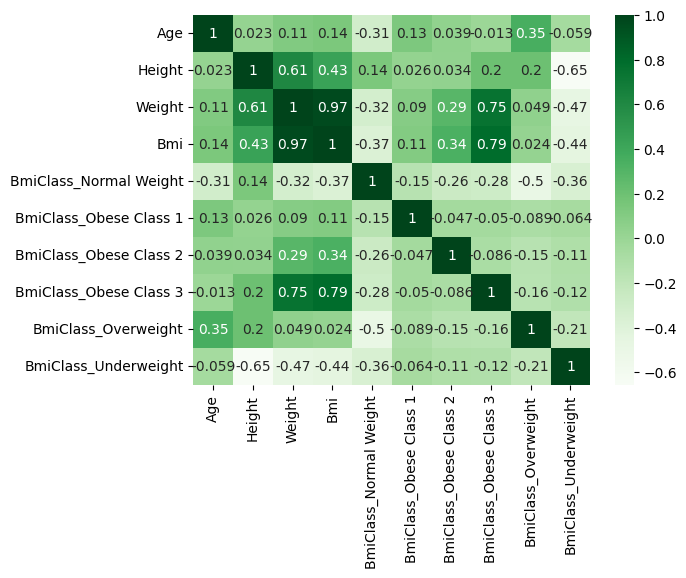

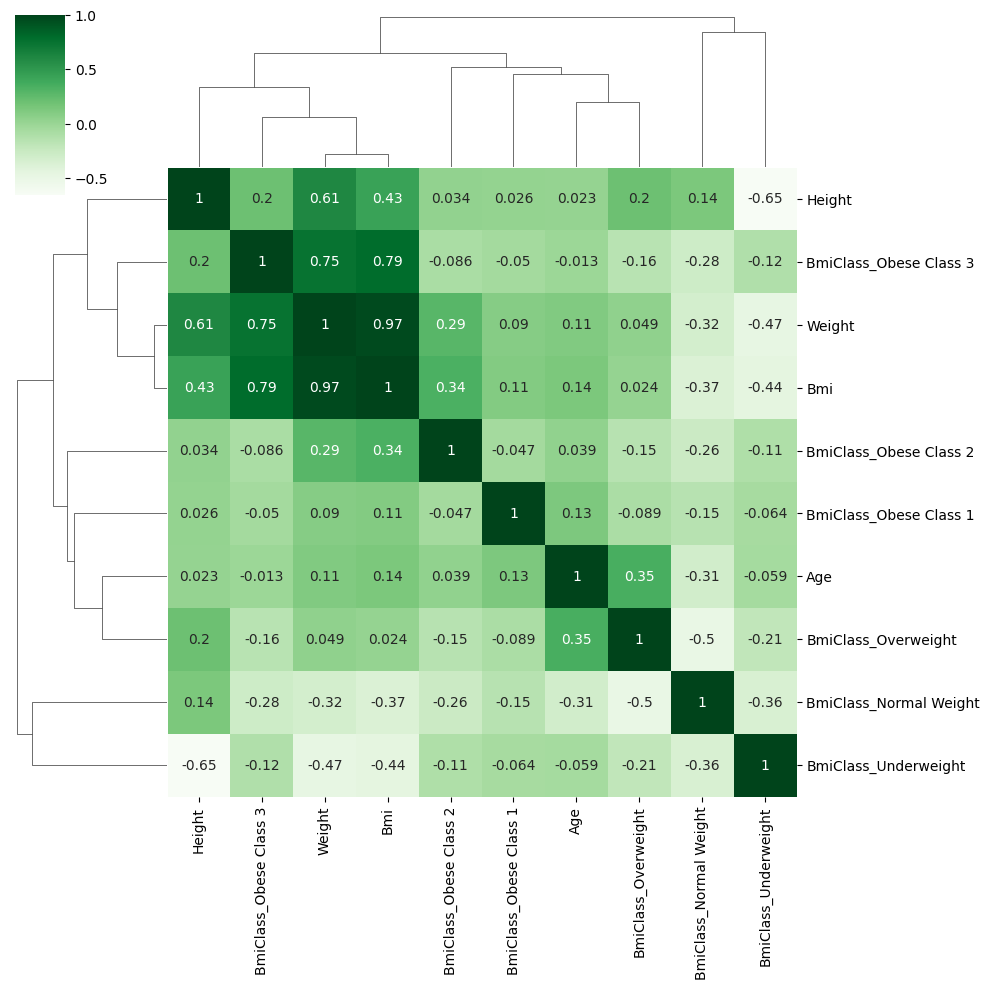

In [13]:
sns.heatmap(corel,cmap='Greens',annot=True)
plt.show()


sns.clustermap(corel,cmap='Greens',annot=True)
plt.show()

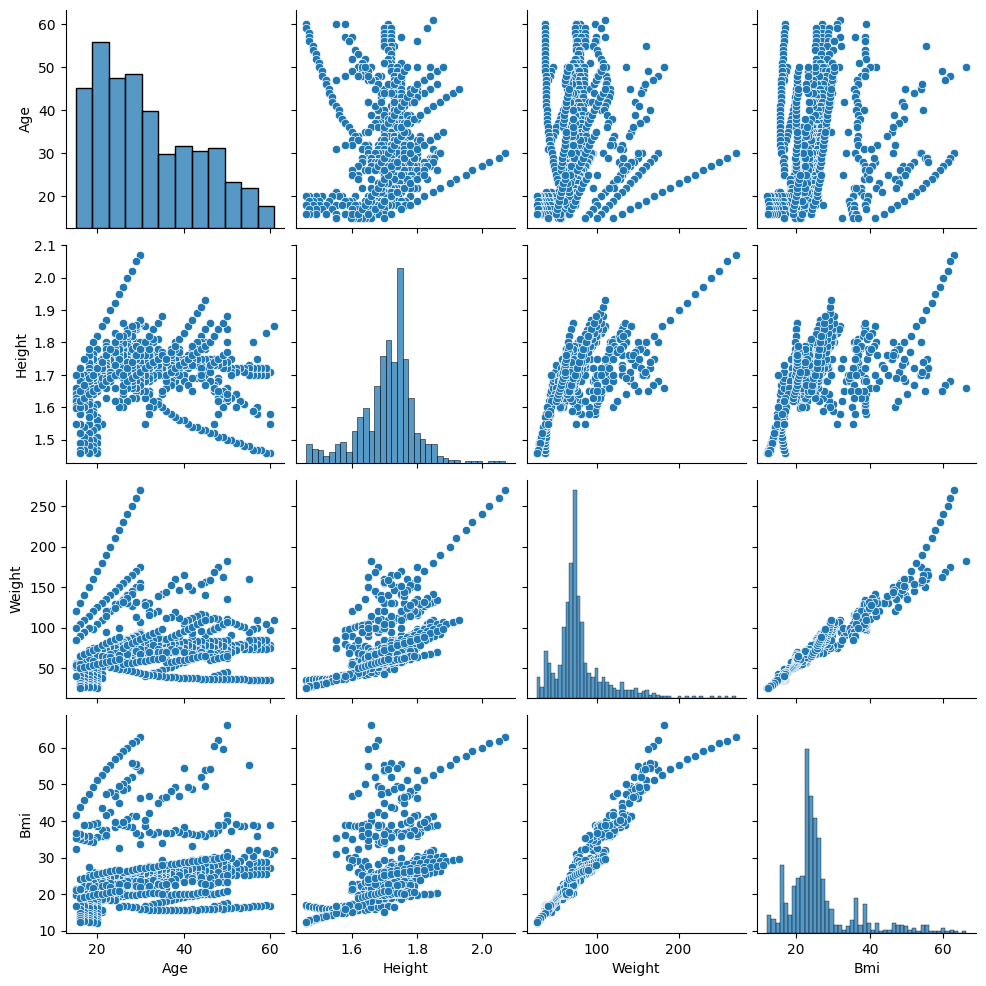

In [14]:
sns.pairplot(data=df)
plt.show()

# Age distribution histogram

In [15]:
age_hist = px.histogram(df, x='Age', title='Age Distribution')
age_hist.show()

# Age vs Bmi 

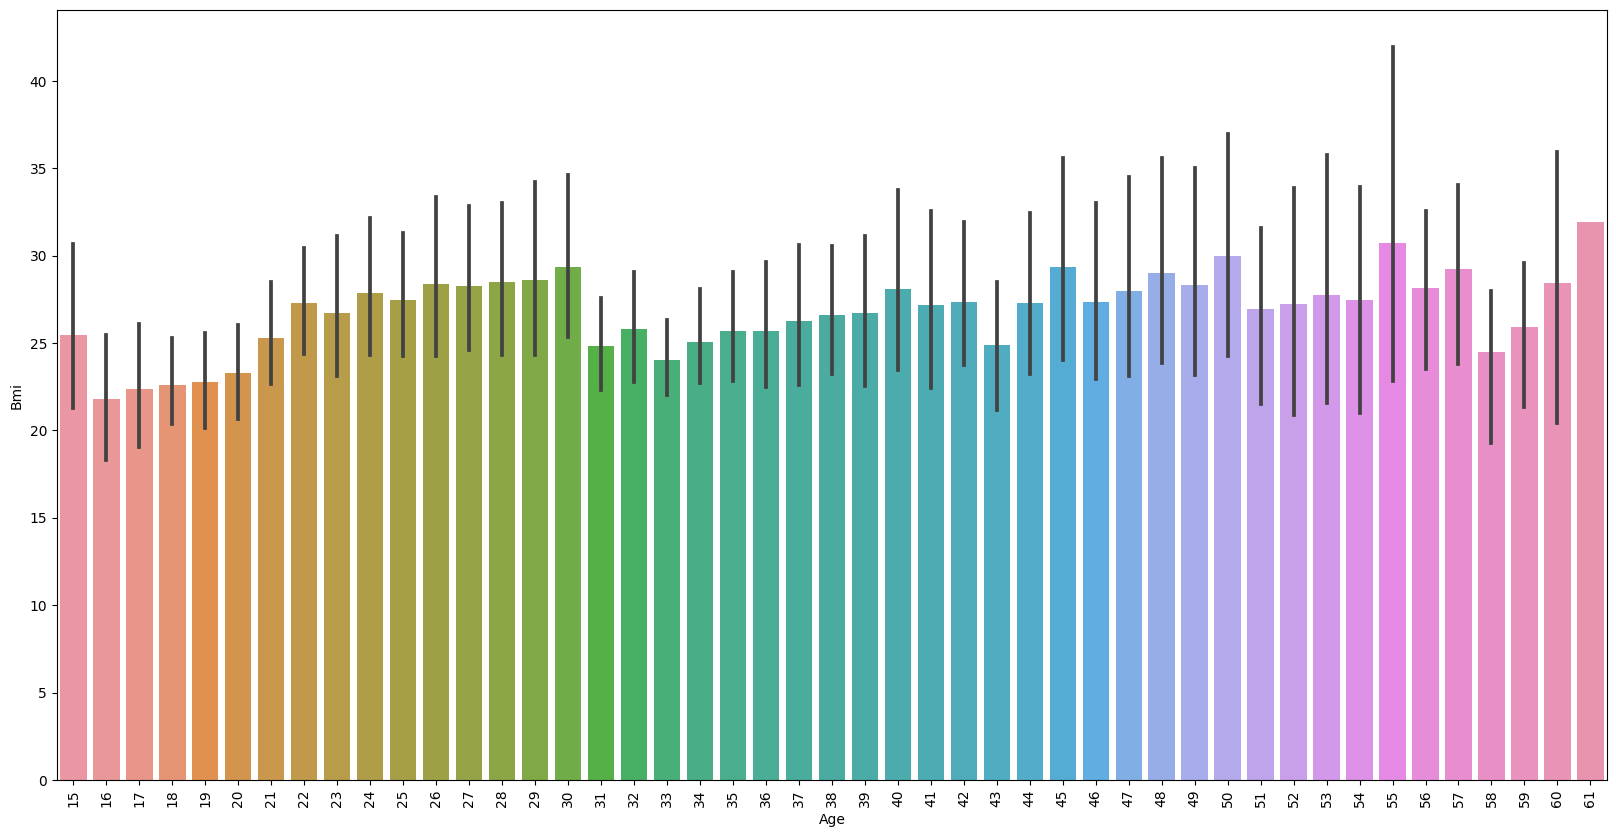

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Age', y='Bmi')
plt.xticks(rotation=90)
plt.show()

# Age vs BMIClass

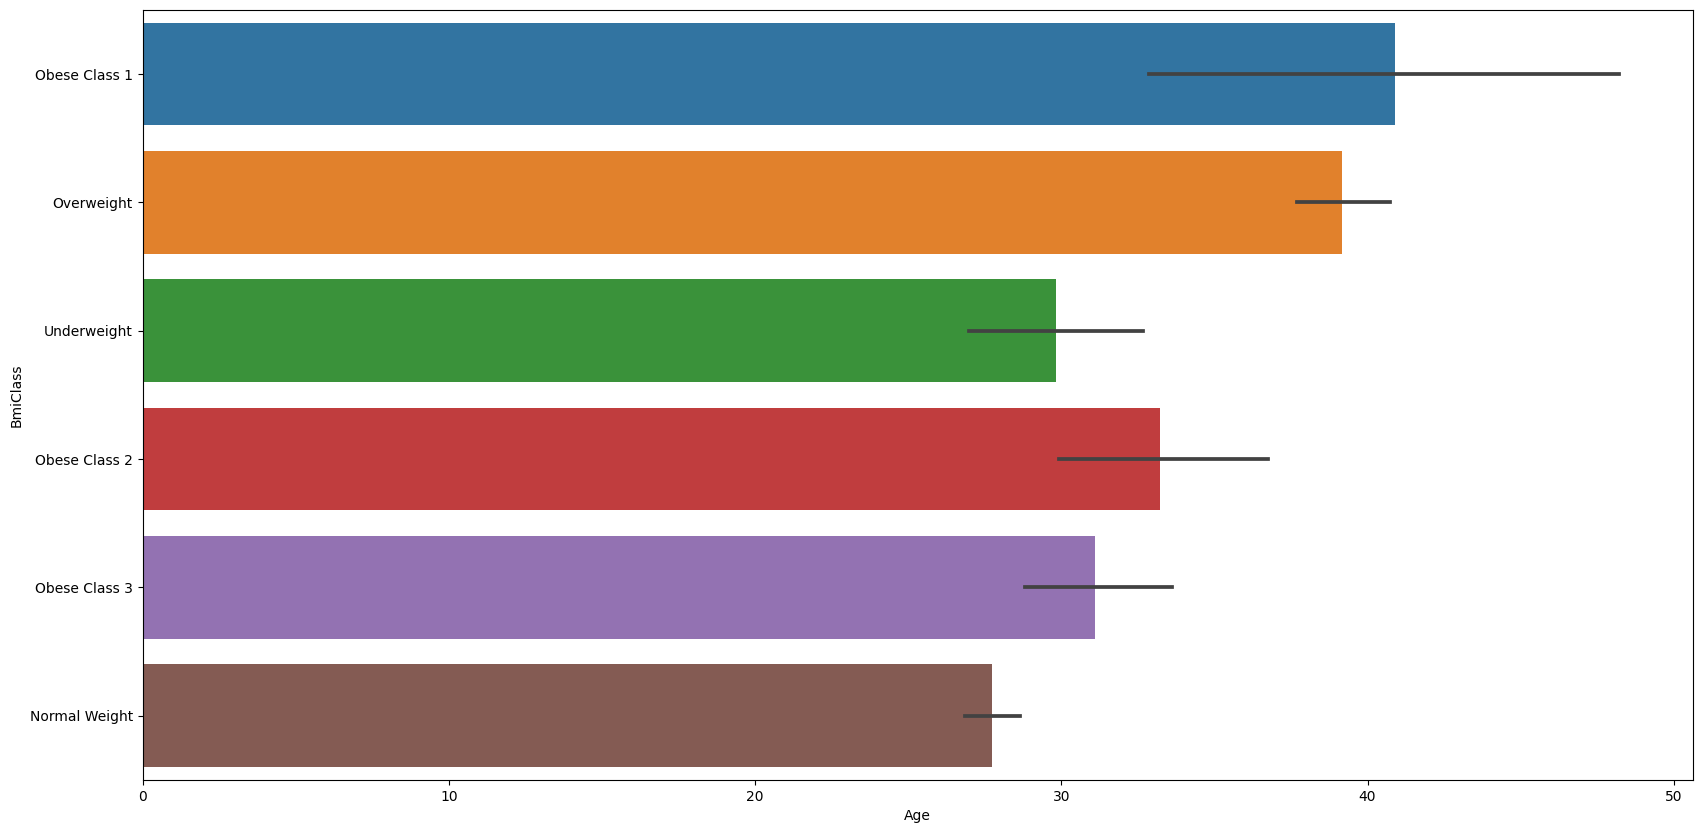

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Age', y='BmiClass')
plt.show()

# 3D scatter plot

In [18]:
fig = px.scatter_3d(df, x='Age', y='Height', z='Weight', color='BmiClass',
                    title='3D Scatter Plot of Age, Height, and Weight')
fig.show()

# Height vs. Weight scatter plot

In [19]:
height_weight_scatter = px.scatter(df, x='Height', y='Weight', title='Height vs. Weight')
height_weight_scatter.show()


# BMI distribution by BMI class

In [20]:
bmi_class_distribution = df_encoded[['BmiClass_Normal Weight', 'BmiClass_Obese Class 1', 'BmiClass_Obese Class 2', 
                             'BmiClass_Obese Class 3', 'BmiClass_Overweight', 'BmiClass_Underweight']].sum()

bmi_class_distribution_bar = px.bar(x=bmi_class_distribution.index, y=bmi_class_distribution.values,
                                    title='BMI Class Distribution')
bmi_class_distribution_bar.show()

# Box plot for BMI

In [21]:
bmi_box_plot = px.box(df_encoded, y='Bmi', title='BMI Box Plot')
bmi_box_plot.show()

# Pairwise scatter plot

In [22]:
scatter_matrix = px.scatter_matrix(df, dimensions=['Age', 'Height', 'Weight', 'Bmi'], 
                                   title='Pairwise Scatter Plot')
scatter_matrix.update_traces(marker=dict(size=3),
                             diagonal_visible=False)
scatter_matrix.show()


# Distribution of Categorical Variables


In [23]:
bmi_class_distribution = df_encoded['BmiClass_Normal Weight'].value_counts()

category_bar = px.bar(x=bmi_class_distribution.index, y=bmi_class_distribution.values,
                      title='BmiClass_Normal Weight Distribution')
category_bar.show()


# Age vs. BMI by BMI Class

In [24]:
age_bmi_bmi_class = px.scatter(df_encoded, x='Age', y='Bmi', color='BmiClass_Normal Weight',
                                title='Age vs. BMI by BMI Class')
age_bmi_bmi_class.show()


In [25]:
app = dash.Dash(__name__)

app.layout = html.Div([
    dash_table.DataTable(
        id='table',
        columns=[{"name": col, "id": col} for col in df.columns],
        data=df.to_dict('records')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


# ****Modelling

# Classification (Predicting BMI Classification)

In [26]:
# Assuming 'X' contains the feature columns and 'y' contains the target (BMI classification)
X = df_encoded[['Age', 'Height', 'Weight', 'Bmi']]
y = df_encoded['BmiClass_Normal Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.785234899328859
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.73      0.80        90
        True       0.68      0.86      0.76        59

    accuracy                           0.79       149
   macro avg       0.79      0.80      0.78       149
weighted avg       0.81      0.79      0.79       149



# Regression (Predicting BMI)

In [27]:
# Assuming 'X' contains the feature columns and 'y' contains the target (BMI)
X = df[['Age', 'Height', 'Weight']]
y = df['Bmi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.3282784701010169
R-squared: 0.9814173776670391


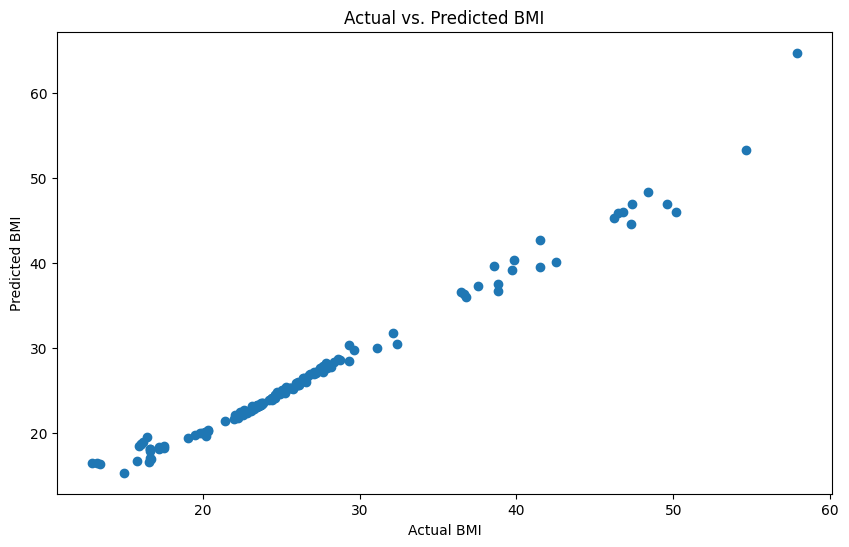

In [28]:
# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs. Predicted BMI')
plt.show()

# 'Decision Tree'
# 'Random Forest'
# 'Support vector Machine'

In [29]:
X = df_encoded[['Age', 'Height', 'Weight', 'Bmi']]
y = df_encoded['BmiClass_Normal Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate each classifier
accuracy_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy


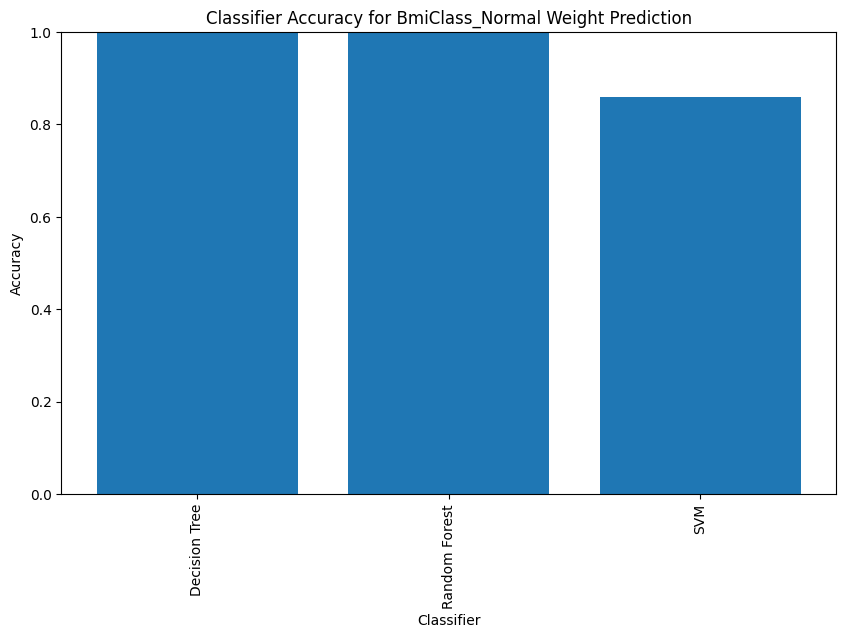

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for BmiClass_Normal Weight Prediction')
plt.ylim(0, 1.0)
plt.xticks(rotation=90)
plt.show()